In [4]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [5]:
def padding_image(input_img, filter_size):
    adjustment=int(np.floor(filter_size/2))
    return np.pad(input_img,pad_width=adjustment,mode='constant')
    

In [12]:
def convolution(img, f):
    #output image
    out_img = np.zeros(img.shape, dtype=np.uint8)
    
    #fliping the filter in 
    f_flip = np.flip(np.flip(f,0),1)
    
    #getting the dimensios of the filter
    f_n,f_m= f.shape
    
    fa = int((f_n-1)/2) 
    fb = int((f_m-1)/2) 
    
    #padding the image and getting its dimensions
    pd_img = padding_image(img, f_n)
    pd_img_n,pd_img_m = pd_img.shape
    
    for x in range(fa, (pd_img_n-fa)):
        for y in range(fb, (pd_img_m - fb)):
            
            img_region = pd_img[ x-fa:x+(fa+1), y-fb:y+(fb+1)]
            
            out_img[(x-fa),(y-fb)] = np.sum(np.multiply(img_region, f_flip))
            
    return out_img.astype(np.uint8)
    
    

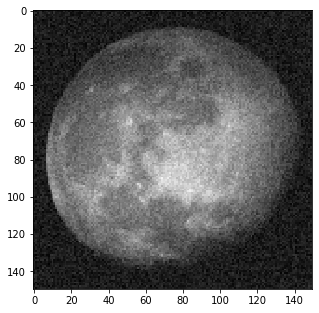

In [9]:
img1 = imageio.imread("images/moon.png")

plt.figure(figsize =(11, 11))
plt.subplot(121)
plt.imshow(img1, cmap="gray", vmin= 0, vmax=255)

In [10]:
f = np.matrix([[1,1,1], [1,1,1], [1,1,1]])/9.0
print(f)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [13]:
img1_mean = convolution(img1, f)

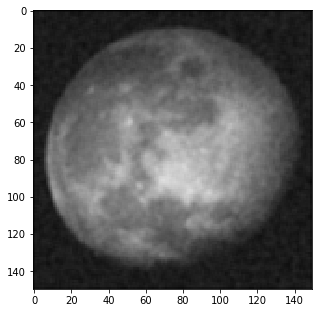

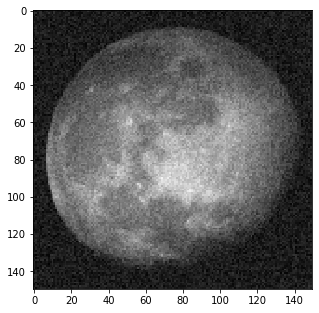

In [17]:
plt.figure(figsize =(11, 11))
plt.subplot(121)
plt.imshow(img1_mean, cmap="gray", vmin= 0, vmax=255)
plt.subplot(121)
plt.imshow(img1, cmap="gray", vmin= 0, vmax=255)